In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("final-project-playfair.ipynb")

# Final Project: Playfair cipher

This choice for the final project will focus on the [Playfair cipher](https://en.wikipedia.org/wiki/Playfair_cipher).

From Wikipedia:
>The technique encrypts pairs of letters (bigrams or digrams), instead of single letters as in the simple substitution cipher and rather more complex Vigenère cipher systems then in use. The Playfair is thus significantly harder to break since the frequency analysis used for simple substitution ciphers does not work with it. The frequency analysis of bigrams is possible, but considerably more difficult. With 600 possible bigrams rather than the 26 possible monograms (single symbols, usually letters in this context), a considerably larger cipher text is required in order to be useful.

You will investigate how to create the key and implement the encryption / decryption algorithms in Python.

## Import your toolkit

You are provided the following functions to help complete this assignment:
* `text_clean`
* `text_block`

Run the cell below to import these assignments

In [ ]:
from finaltoolkit import text_clean, text_block

## The Polybius square

The Playfair cipher uses a Polybius square as the substitution key, similar to the ADFGVX and bifid ciphers.

From Wikipedia:

>The Polybius square, also known as the Polybius checkerboard, is a device invented by the ancient Greeks Cleoxenus and Democleitus, and made famous by the historian and scholar Polybius. The device is used for fractionating plaintext characters so that they can be represented by a smaller set of symbols, which is useful for telegraphy, steganography, and cryptography. The device was originally used for fire signalling, allowing for the coded transmission of any message, not just a finite amount of predetermined options as was the convention before.

To create a Polybius square, first create an empty 5x5 grid. Then, fill it with each of the 26 English characters, with `I` and `J` sharing a square (`I` is only shown when displayed). There are $25!$ different ways to fill the square, which makes it very unlikely that someone would be able to guess your key at random.

In practice, however, a keyword is often used to create the square. The letters of the key (without duplicates) are placed from left to right starting in the top row, moving from top to bottom. When the letters in the keyword are used up, the rest of the alphabet follows in regular order. 

For example, the keyword `playfair example` would result in square below, where duplicate letters are omitted from the square, but still shown in red:

![](https://upload.wikimedia.org/wikipedia/commons/e/ef/Playfair_Cipher_building_grid_omitted_letters.png)

For this assignment, the polybius square must be represented as a string, which is constructed by reading the square left to right, top to bottom.

For example, polybius square from the keyword `playfair example` would be represented as:

In [ ]:
example_keyword = 'PLAYFIREXMBCDGHKNOQSTUVWZ'
example_keyword

'PLAYFIREXMBCDGHKNOQSTUVWZ'

**Note**: When creating keys, only the character `I` was stored to the list, not `I/J`. For this assignment, both `I` and `J` should be treated as the character `I`. This will create some odd plaintext messages when deciphering, but humans are good at reading `I`'s as `J`'s when needed. For example, the phrase "Now stop and give me `10 Iumping Iacks`!" would likely be readable to most people.

### Question 1: Accessing elements of the key
The operations needed to encipher and decipher messages require knowing the row and column number for each character in the key. Write a function `get_character` which returns the character at an indicated row and column in the square. You will need to determine how to use the values for `row` and `col` to compute a corresponding index value in the string `key`.

**Note:** The top row will be numbered as row 0, and the last row will be numbered as row 4. The same numbering system applies to the columns.

**Sample Test Cases:**
```
>> get_character('PLAYFIREXMBCDGHKNOQSTUVWZ', row=0, col=0)
'P'

>> get_character('PLAYFIREXMBCDGHKNOQSTUVWZ', row=1, col=4)
'M'

>> get_character('PLAYFIREXMBCDGHKNOQSTUVWZ', row=4, col=3)
'W'
```

In [ ]:
def get_character(key, row, col):
    # BEGIN SOLUTION NO PROMPT
    index = (row)*5 + (col)
    # END SOLUTION
    return key[index] # SOLUTION

In [ ]:
grader.check("q1")

### Question 2

It is also required to determine the row and column number for a given character. Write the functions `get_row` and `get_col` that return an integer that represents the row and column numbers respectively when provided a key and a character contained in the key.

#### Part A: `get_row`

**Sample Test Cases:**

```
>> get_row('PLAYFIREXMBCDGHKNOQSTUVWZ', 'P')
0

>> get_row('PLAYFIREXMBCDGHKNOQSTUVWZ', 'M')
1

>> get_row('PLAYFIREXMBCDGHKNOQSTUVWZ', 'W')
4
```

In [ ]:
def get_row(key, char):
    return key.find(char) // 5 # SOLUTION

In [ ]:
grader.check("q2a")

#### Part B: `get_col`

**Sample Test Cases:**

```
>> get_col('PLAYFIREXMBCDGHKNOQSTUVWZ', 'P')
0

>> get_col('PLAYFIREXMBCDGHKNOQSTUVWZ', 'M')
4

>> get_col('PLAYFIREXMBCDGHKNOQSTUVWZ', 'W')
3
```

In [ ]:
def get_col(key, char):
    return key.find(char) % 5 # SOLUTION

In [ ]:
grader.check("q2b")

### Question 3: Creating the key

Write a function, `keygen` that creates a Polybius square key that is formatted as a list of lists. `keygen` should accept a keyword (as a string) to create the key. If a keyword is not provided, then the square should should be filled with the alphabet in normal order.

**Hint:** You can use the Python operator `in` and `not in` to determine if a character is already in a string. For example:

In [ ]:
'Y' in 'PLAYFAIR'


True

In [ ]:
'L' not in 'PLAYFAIR'

False

This could be helpful if you were to implement a strategy that:
* constructs a string, `all_characters` that consis of the characters in `keyword` and `LETTERS`
* replaces `J` with `I` and saves the result as `all_characters_no_J`
* appends each character of `all_characters_no_J` into a new string, `key`, each time checking checking to make sure it's not already in `key`. 

This should guarantee that `key` only contains the 25 valid characters. Make sure they appear in the correct order!

**Sample Test Cases**:
```
>> keygen()
'ABCDEFGHIKLMNOPQRSTUVWXYZ`

>> keygen( 'Polybius Cipher' )
'POLYBIUSCHERADFGKMNQTVWXZ

>> keygen( keyword = 'Long Jump' )
'LONGIUMPABCDEFHKQRSTVWXYZ'
```

In [ ]:
def keygen(keyword='', LETTERS='ABCDEFGHIKLMNOPQRSTUVWXYZ'):
    
    all_characters = text_clean(keyword) + LETTERS # SOLUTION
    all_characters_no_J = all_characters.replace('J','I') # SOLUTION
    key = '' # SOLUTION
    
    # BEGIN SOLUTION NO PROMPT
    for char in all_characters_no_J:
        if char not in key:
            key += char
    # END SOLUTION
    
    return key # SOLUTION

In [ ]:
grader.check("q3")

## The Playfair Cipher

From Wikipedia:

To encrypt a message, one would break the message into digrams (groups of 2 letters) such that, for example, `HelloWorld` becomes `HE LL OW OR LD`. These digrams will be substituted using the key table. 

Since encryption requires pairs of letters, messages with an odd number of characters usually append an uncommon letter, such as `X`, to complete the final digram. 

The two letters of the digram are considered opposite corners of a rectangle in the key table. To perform the substitution, apply the following 4 rules, in order, to each pair of letters in the plaintext:

1. If both letters are the same (or only one letter is left), add an `X` after the first letter. Encrypt the new pair and continue.
2. If the letters appear on the same row of your table, replace them with the letters to their immediate right respectively (wrapping around to the left side of the row if a letter in the original pair was on the right side of the row). <br>![](https://upload.wikimedia.org/wikipedia/commons/2/29/Playfair_Cipher_10_EX_to_XD.png)
3. If the letters appear on the same column of your table, replace them with the letters immediately below respectively (wrapping around to the top side of the column if a letter in the original pair was on the bottom side of the column).<br>![](https://upload.wikimedia.org/wikipedia/commons/4/44/Playfair_Cipher_02_DE_to_OD.png)
4. If the letters are not on the same row or column, replace them with the letters on the same row respectively but at the other pair of corners of the rectangle defined by the original pair. The order is important – the first letter of the encrypted pair is the one that lies on the same row as the first letter of the plaintext pair.<br>![](https://upload.wikimedia.org/wikipedia/commons/4/40/Playfair_Cipher_01_HI_to_BM.png)

To decrypt, use the inverse (opposite) of the two shift rules, selecting the letter to the left or upwards as appropriate. The last rule remains unchanged, as the transformation switches the selected letters of the rectangle to the opposite diagonal, and a repeat of the transformation returns the selection to its original state. The first rule can only be reversed by dropping any extra instances of the chosen insert letter, `X`, that do not make sense in the final message when finished. This is typically done by hand.

### Question 4: Cleaning the message

When encrypting a message, the Playfair Cipher selects two consecutive plaintext letters and uses the Polybius square to perform a substitution to produce 2 ciphertext characters. The algorithm requires the following:
   * There should not be any `J`'s in your message. `J` should replaced with `I`
   * Two consecutive letters must be different characters. If they are the same character, insert an 'X' after the first character.
   * The message must be even in length so letters can always be taken in pairs.
   
Write a function `playfair_textclean` that ensures the criteria are met for any provided message.

**Sample Test Cases**:
```
>>> playfair_textclean( 'HEY' )
'HEYX'

>>> playfair_textclean( 'Jump' )
'IUMP'

>>> playfair_textclean( 'Hide the gold in the tree stump' )
'HIDETHEGOLDINTHETREXESTUMP'

>>> playfair_textclean( 'mississippi' )
'MISXSISXSIPXPI'
```

In [ ]:
def playfair_textclean(message):
    
    # Clean the message using text_clean, then replace the Js
    cleaned_message = text_clean(message).replace('J', 'I') # SOLUTION
    
    # Handle any pairs of letters that are the same character
    
    # BEGIN SOLUTION NO PROMPT
    i = 0
    while i < len(cleaned_message)-1:
        if cleaned_message[i] == cleaned_message[i+1]:
            cleaned_message = cleaned_message[0:i+1] + 'X' + cleaned_message[i+1:]
        i +=2
    # END SOLUTION
    
    # Determine if the message has an odd number of characters
    # and if so, append an 'X' at the end.
    
    # BEGIN SOLUTION NO PROMPT
    if len(cleaned_message) % 2 == 1:
        cleaned_message += 'X'
    
    return cleaned_message
    # END SOLUTION

In [ ]:
grader.check("q4")

### Question 5: Encryption / Decryption

At this point you should now be able write a function `playfair` that implements the playfair cipher using a provided keyword and message. The function should also accept a boolean value to `encipher` that when set to `True` encrypts the `message` with the `key` and when set to `False` decrypts the `message` with the `key`.

**Sample Test Cases**:
```
>>> playfair('playfair example', 'Hide the gold in the tree stump')
'BMODZ BXDNA BEKUD MUIXM MOUVI F'

>>> playfair('playfair example', 'BMODZ BXDNA BEKUD MUIXM MOUVI F', False)
'hidethegoldinthetrexestump'
```

In [ ]:
def playfair(keyword, message, encipher=True):
    
    key = keygen(keyword) # SOLUTION
    cleaned_message = playfair_textclean(message) # SOLUTION
    output = ''
    
    # BEGIN SOLUTION NO PROMPT
    if encipher:
        for i in range(0, len(cleaned_message), 2):
            char1_row = get_row(key, cleaned_message[i])
            char1_col = get_col(key, cleaned_message[i])
            
            char2_row = get_row(key, cleaned_message[i+1])
            char2_col = get_col(key, cleaned_message[i+1])
            
            # If characters are in the same row
            if char1_row == char2_row:
                output += get_character(key, char1_row, (char1_col + 1) % 5)
                output += get_character(key, char2_row, (char2_col + 1) % 5)
            
            # If same column
            elif char1_col == char2_col:
                output += get_character(key, (char1_row + 1) % 5, char1_col )
                output += get_character(key, (char2_row + 1) % 5, char2_col )
            
            # If different rows and columns
            else:
                output += get_character(key, char1_row, char2_col)
                output += get_character(key, char2_row, char1_col)
    else:
        for i in range(0, len(cleaned_message), 2):
            char1_row = get_row(key, cleaned_message[i])
            char1_col = get_col(key, cleaned_message[i])
            
            char2_row = get_row(key, cleaned_message[i+1])
            char2_col = get_col(key, cleaned_message[i+1])
            
            # If characters are in the same row
            if char1_row == char2_row:
                output += get_character(key, char1_row, (char1_col - 1) % 5)
                output += get_character(key, char2_row, (char2_col - 1) % 5)
            
            # If same column
            elif char1_col == char2_col:
                output += get_character(key, (char1_row - 1) % 5, char1_col )
                output += get_character(key, (char2_row - 1) % 5, char2_col )
            
            # If different rows and columns
            else:
                output += get_character(key, char1_row, char2_col)
                output += get_character(key, char2_row, char1_col)
    # END SOLUTION
    
    return text_block(output, 5) # SOLUTION

In [ ]:
grader.check("q5")

## Ciphertext analysis

There is a file included with this notebook that contains the first chapter of Pride and Prejudice. The questions below will ask you to analyze a ciphertext that uses this chapter as the plaintext. Each question will ask you to replace `...`'s in a code cell with your answer, either a multiple choice response (`'A'`, `'B'`, etc) or a free response. These responses will only be graded for accuracy once you've submitted your assignment, so make sure you are certain of your answers before submitting!

Run the cell below to load the chapter to the string named `plaintext`

In [ ]:
with open('pride-prejudice-chapter-01.txt') as f:
    plaintext = f.read()

<!-- BEGIN QUESTION -->

### Question 6: Creating a bar chart

Encrypt the plaintext using a keyword of `Jane Austen`, then create a bar chart that shows the single character frequencies of each of the 25 English characters used in the message.

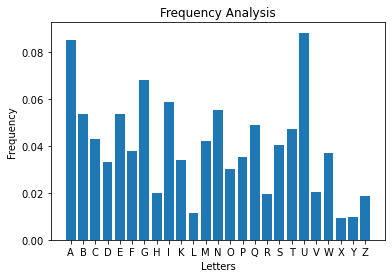

In [ ]:
ciphertext = playfair('Jane Austen', plaintext) # SOLUTION

# BEGIN SOLUTION NO PROMPT
import matplotlib.pyplot as plt
LETTERS = 'ABCDEFGHIKLMNOPQRSTUVWXYZ'
frequencies = []
ciphertext_length = len(ciphertext.replace(' ',''))

for char in LETTERS:
    frequencies.append( ciphertext.count(char) / ciphertext_length )
    
plt.bar(list(LETTERS), frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency Analysis')

plt.show()
# END SOLUTION

<!-- END QUESTION -->

### Question 7: Index of Coincidence

Write a function `index_of_coincidence` to compute the index of coincidence of the ciphertext.

**Hint:** Reference Lesson 17 and Lab 04 if you need a refresher!

In [ ]:
def index_of_coincidence(message, LETTERS='ABCDEFGHIKLMNOPQRSTUVWXYZ'):
    
    # BEGIN SOLUTION NO PROMPT    
    cleaned_message = text_clean(message, LETTERS)
    message_length = len(cleaned_message) 
    
    total = 0
    for char in LETTERS:
        total += ( cleaned_message.count(char) / message_length ) *  ( (cleaned_message.count(char)-1) / (message_length-1) )
    # END SOLUTION
    return total # SOLUTION

In [ ]:
grader.check("q7")

### Question 8: Classifying the cipher

The Playfair cipher is what's known as a polygraphic cipher. It's not a monoalphabetic substitution cipher or a polyalphabetic substitution cipher.

Based on the coincidence value you computed in Question 7, which of the following does it behave *most* like:

1. monoalphabetic substitution cipher
2. polyalphabetic substitution cipher

Assign the answer choice as an integer to the variable `q8` below.

In [ ]:
q8 = 2 # SOLUTION

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Before exporting, SAVE your notebook, then RESTART AND RUN ALL CELLS. This will run the export cell. Make sure you submit the most recent copy by using the date-time stamp on the file.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)